In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
pd.set_option('display.float_format', '{:20,.2f}'.format)
pd.set_option('display.max_colwidth', None)

In [3]:
def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [4]:
pth = '/data1/vchua/may16-lpot-hf/lpot/examples/pytorch/huggingface_models/examples/text-classification/lpot-bert-base-uncased-finetuned-mrpc_run/history.snapshot.csv'

In [5]:
df = pd.read_csv(pth)
df = df.fillna("-")

<AxesSubplot:xlabel='episode'>

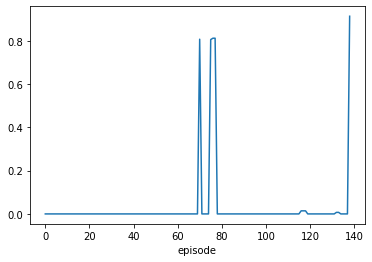

In [6]:
df.groupby('episode').mean()['tune_res0'].plot()

<AxesSubplot:xlabel='episode'>

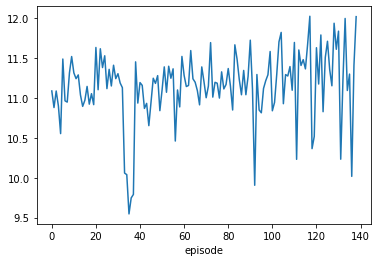

In [7]:
df.groupby('episode').mean()['tune_res1'].plot()

In [8]:
from collections import OrderedDict
import itertools as it
import numpy as np

In [9]:
col_groups = [['w_dtype', 'w_scheme', 'w_granularity', 'w_algorithm'], ['a_dtype', 'a_scheme', 'a_granularity', 'a_algorithm']]

combi_group = OrderedDict()
for i, col_grp in enumerate(col_groups):
    combi_group[i] = OrderedDict()
    
    for col in col_grp:
        combi_group[i][col] = list(df.groupby(col).groups.keys())

In [10]:
def get_bw_distribution(df):
    count=OrderedDict()

    w_combinations = it.product(*(combi_group[0][col] for col in combi_group[0]))
    a_combinations = it.product(*(combi_group[1][col] for col in combi_group[1]))

    for w_combi in list(w_combinations):
        bool_flag = [True] * len(df)
        for col, val in zip(list(combi_group[0].keys()), w_combi):
#             print(col,"==", val)
            bool_flag = bool_flag & (df[col]==val)
        count['W '+str(w_combi)] = sum(bool_flag)
    
    for a_combi in list(a_combinations):
        bool_flag = [True] * len(df)
        for col, val in zip(list(combi_group[1].keys()), a_combi):
#             print(col,"==", val)
            bool_flag = bool_flag & (df[col]==val)
        count['A '+str(a_combi)] = sum(bool_flag)

#     return pd.DataFrame.from_dict(count)
    return pd.DataFrame(count, index=[0])

In [11]:
quantizer_dist = df.groupby(['episode']).apply(get_bw_distribution)

In [20]:
qdist = quantizer_dist.reset_index()[['episode']+\
                                     list(quantizer_dist.columns[quantizer_dist.sum() > 0])] # filter out invalid config by assuming that if they never occur

In [25]:
qdist.tail(1).T.reset_index()

index  138
0                                      episode  138
1                    W ('fp32', '-', '-', '-')   65
2   W ('int8', 'sym', 'per_channel', 'minmax')    9
3                    A ('fp32', '-', '-', '-')   65
4  A ('uint8', 'asym', 'per_tensor', 'minmax')    9

In [37]:
df.loc[df.episode==76]

episode  layer_id                                    layer_name layer_type w_dtype w_scheme w_granularity w_algorithm                w_bit a_dtype a_scheme a_granularity a_algorithm            tune_res0            tune_res1
5624       76         0     bert.encoder.layer.0.attention.self.query     Linear    int8      sym   per_channel      minmax                 7.00   uint8     asym    per_tensor      minmax                 0.81                11.00
5625       76         1       bert.encoder.layer.0.attention.self.key     Linear    int8      sym   per_channel      minmax                 7.00   uint8     asym    per_tensor      minmax                 0.81                11.00
5626       76         2     bert.encoder.layer.0.attention.self.value     Linear    int8      sym   per_channel      minmax                 7.00   uint8     asym    per_tensor      minmax                 0.81                11.00
5627       76         3   bert.encoder.layer.0.attention.output.dense     Linear    int8      sym   per_channel      minmax                 7.00   uint8     asym    per_tensor      minmax                 0.81                11.00
5628       76         4       bert.encoder.layer.0.intermediate.dense     Linear    fp32        -             -           -                    -    fp32        -             -           -                 0.81                11.00
5629       76         5             bert.encoder.layer.0.output.dense     Linear    int8      sym   per_channel      minmax                 7.00   uint8     asym    per_tensor      minmax                 0.81                11.00
5630       76         6     bert.encoder.layer.1.attention.self.query     Linear    int8      sym   per_channel      minmax                 7.00   uint8     asym    per_tensor      minmax                 0.81                11.00
5631       76         7       bert.encoder.layer.1.attention.self.key     Linear    int8      sym   per_channel      minmax                 7.00   uint8     asym    per_tensor      minmax                 0.81                11.00
5632       76         8     bert.encoder.layer.1.attention.self.value     Linear    int8      sym   per_channel      minmax                 7.00   uint8     asym    per_tensor      minmax                 0.81                11.00
5633       76         9   bert.encoder.layer.1.attention.output.dense     Linear    int8      sym   per_channel      minmax                 7.00   uint8     asym    per_tensor      minmax                 0.81                11.00
5634       76        10       bert.encoder.layer.1.intermediate.dense     Linear    int8      sym   per_channel      minmax                 7.00   uint8     asym    per_tensor      minmax                 0.81                11.00
5635       76        11             bert.encoder.layer.1.output.dense     Linear    int8      sym   per_channel      minmax                 7.00   uint8     asym    per_tensor      minmax                 0.81                11.00
5636       76        12     bert.encoder.layer.2.attention.self.query     Linear    int8      sym   per_channel      minmax                 7.00   uint8     asym    per_tensor      minmax                 0.81                11.00
5637       76        13       bert.encoder.layer.2.attention.self.key     Linear    int8      sym   per_channel      minmax                 7.00   uint8     asym    per_tensor      minmax                 0.81                11.00
5638       76        14     bert.encoder.layer.2.attention.self.value     Linear    int8      sym   per_channel      minmax                 7.00   uint8     asym    per_tensor      minmax                 0.81                11.00
5639       76        15   bert.encoder.layer.2.attention.output.dense     Linear    int8      sym   per_channel      minmax                 7.00   uint8     asym    per_tensor      minmax                 0.81                11.00
5640       76        16       bert.encoder.layer.2.intermediate.dense     Linear    int8      sy

In [ ]:
df.style.set_properties(subset=["col1", "col2"], **{'text-align': 'right'})

In [8]:
import pickle

In [10]:
ppth = '/data1/vchua/may16-lpot-hf/lpot/examples/pytorch/huggingface_models/examples/text-classification/lpot-bert-base-uncased-finetuned-mrpc_run/history.snapshot'

In [11]:
with open(ppth, "rb") as FH:
    p = pickle.load(FH)

In [9]:
df.fillna("-")

episode  layer_id                                    layer_name layer_type w_dtype w_scheme w_granularity w_algorithm                w_bit a_dtype a_scheme a_granularity a_algorithm            tune_res0            tune_res1
0            0         0     bert.encoder.layer.0.attention.self.query     Linear    int8      sym   per_channel      minmax                 7.00   uint8     asym    per_tensor      minmax                 0.00                11.09
1            0         1       bert.encoder.layer.0.attention.self.key     Linear    int8      sym   per_channel      minmax                 7.00   uint8     asym    per_tensor      minmax                 0.00                11.09
2            0         2     bert.encoder.layer.0.attention.self.value     Linear    int8      sym   per_channel      minmax                 7.00   uint8     asym    per_tensor      minmax                 0.00                11.09
3            0         3   bert.encoder.layer.0.attention.output.dense     Linear    int8      sym   per_channel      minmax                 7.00   uint8     asym    per_tensor      minmax                 0.00                11.09
4            0         4       bert.encoder.layer.0.intermediate.dense     Linear    int8      sym   per_channel      minmax                 7.00   uint8     asym    per_tensor      minmax                 0.00                11.09
5            0         5             bert.encoder.layer.0.output.dense     Linear    int8      sym   per_channel      minmax                 7.00   uint8     asym    per_tensor      minmax                 0.00                11.09
6            0         6     bert.encoder.layer.1.attention.self.query     Linear    int8      sym   per_channel      minmax                 7.00   uint8     asym    per_tensor      minmax                 0.00                11.09
7            0         7       bert.encoder.layer.1.attention.self.key     Linear    int8      sym   per_channel      minmax                 7.00   uint8     asym    per_tensor      minmax                 0.00                11.09
8            0         8     bert.encoder.layer.1.attention.self.value     Linear    int8      sym   per_channel      minmax                 7.00   uint8     asym    per_tensor      minmax                 0.00                11.09
9            0         9   bert.encoder.layer.1.attention.output.dense     Linear    int8      sym   per_channel      minmax                 7.00   uint8     asym    per_tensor      minmax                 0.00                11.09
10           0        10       bert.encoder.layer.1.intermediate.dense     Linear    int8      sym   per_channel      minmax                 7.00   uint8     asym    per_tensor      minmax                 0.00                11.09
11           0        11             bert.encoder.layer.1.output.dense     Linear    int8      sym   per_channel      minmax                 7.00   uint8     asym    per_tensor      minmax                 0.00                11.09
12           0        12     bert.encoder.layer.2.attention.self.query     Linear    int8      sym   per_channel      minmax                 7.00   uint8     asym    per_tensor      minmax                 0.00                11.09
13           0        13       bert.encoder.layer.2.attention.self.key     Linear    int8      sym   per_channel      minmax                 7.00   uint8     asym    per_tensor      minmax                 0.00                11.09
14           0        14     bert.encoder.layer.2.attention.self.value     Linear    int8      sym   per_channel      minmax                 7.00   uint8     asym    per_tensor      minmax                 0.00                11.09
15           0        15   bert.encoder.layer.2.attention.output.dense     Linear    int8      sym   per_channel      minmax                 7.00   uint8     asym    per_tensor      minmax                 0.00                11.09
16           0        16       bert.encoder.layer.2.intermediate.dense     Linea